## Logistic regression

In [5]:
import pickle

pe = '../_data/patients/orpha_patient_embeddings.pkl'
pd = '../_data/patients/orpha_patients_disease.pkl'

def load_object(fn):
    with open(fn, 'rb') as file:
        return pickle.load(file)

# patient_embeddings_sum = pd.read_csv(fn, low_memory=False)
patient_embeddings = load_object(pe)
patient_disease = load_object(pd)

In [26]:
X = {}
num_patients = len(patient_embeddings)

for i, patient in enumerate(patient_embeddings):
    for j in range(i+1, num_patients):
        if patient_disease[patient] == patient_disease['P'+str(j)]:
            X[patient+'-P'+str(j)] = {
                'emb': patient_embeddings[patient]+patient_embeddings['P'+str(j)],
                'y': 1
            }
        else:
             X[patient+'-P'+str(j)] = {
                'emb': patient_embeddings[patient]+patient_embeddings['P'+str(j)],
                'y': 0
            }            

In [53]:
X_ = []
for x in X:
    X_aux = {}
    for thing in X[x]:
        if thing == 'emb':
            for i, element in enumerate(X[x][thing]):
                X_aux[i] = element
        else:
            X_aux['y'] = X[x]['y']
    X_.append(X_aux)

In [59]:
import pandas as pd

X_df = pd.DataFrame(X_)

In [61]:
X_g = X_df.drop('y', axis=1)
y = X_df[['y']]

In [63]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_g,y,test_size=0.2)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2)

In [65]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)
preds_valid = lreg.predict(X_val)
print(classification_report(y_val,preds_valid))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


NameError: name 'classification_report' is not defined

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X_g, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.99


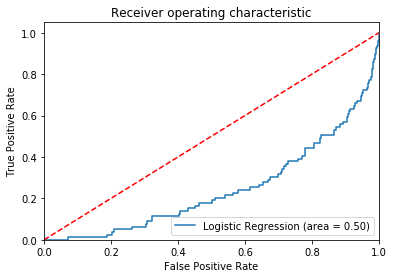

In [71]:
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()